In [1]:
import pandas as pd


In [2]:
data=pd.read_csv('GN60K.csv')
data

title  \
0      Shoppers stockpile Aldi's fur throw after it r...   
1      Goolag: Marlow Book Reveals Google Still Suppr...   
2      Caitlyn Jenner Defends Dave Chappelle: ‘100 Pe...   
3                             Best SUVs on sale for 2022   
4      Report: Florida’s Transgender Sports Ban Expec...   
...                                                  ...   
60140           Could word power save us from road rage?   
60141  Rams Star Jalen Ramsey Reportedly Gives Away $...   
60142                    Parenting tips from special ops   
60143                     Fry’s big adventure as Gaeilge   
60144  Venture Capitalist Sells His Stake In Space To...   

                                                    text  \
0      With the chilly season in full swing, Aldi sho...   
1      Google’s own analytics data continues to show ...   
2      Caitlyn Jenner backed comedy icon Dave Chappel...   
3      Sport utility vehicles have come a long way fr...   
4      State Lawmakers in Florida are poised to rejec...   
...                                                  ...   
60140  Who knew that a Walt Disney cartoon made years...   
60141  Los Angeles Rams’ cornerback Jalen Ramsey repo...   
60142  You’ve see me around. I’m the dad struggling w...   
60143  TV REVIEW\n   STEPHEN Fry caused quite a stir ...   
60144  Venture capitalist Chamath Palihapitiya sold t...   

                           topic  
0                     weird-news  
1                           tech  
2      entertainment & celebrity  
3                           tech  
4                         sports  
...                          ...  
60140               arts-culture  
60141                     sports  
60142               arts-culture  
60143               arts-culture  
60144         business & economy  

[60145 rows x 3 columns]

In [3]:
# from textblob import TextBlob
# cp=0
# cn=0
# c=0
# score=[]
# for text in data['text']:
#     blob=TextBlob(text)
#     p=blob.sentiment.polarity
#     score.append(p)
#     if(p>0.1):
#         cp+=1
#     elif (p < 0.1):
#         cn+=1
#     else:
#         c+=1
# print(cp,cn,c)

In [4]:
# def categorize_sentiment(score, thresholds):
#     if score <= thresholds['negative']:
#         return 'Negative'
#     elif score >= thresholds['positive']:
#         return 'Positive'
#     else:
#         return 'Neutral'


# def find_thresholds(sentiment_scores):
#     # Sort the sentiment scores
#     sorted_scores = sorted(sentiment_scores)

#     # Define threshold indices (e.g., first quartile, third quartile)
#     first_quartile_index = len(sorted_scores) // 4
#     third_quartile_index = 3 * (len(sorted_scores) // 4)

#     # Calculate threshold values
#     thresholds = {
#         'negative': sorted_scores[first_quartile_index],
#         'positive': sorted_scores[third_quartile_index]
#     }

#     return thresholds


# # Example sentiment scores


# # Find threshold values
# thresholds = find_thresholds(score)
# print("Thresholds:", thresholds)

# # Categorize sentiment scores
# categorized_sentiments = [categorize_sentiment(scor, thresholds) for scor in score]
# # print("Categorized Sentiments:", categorized_sentiments)

In [5]:
arr=data['topic'].unique()
print(arr)

['weird-news' 'tech' 'entertainment & celebrity' 'sports'
 'crime & security' 'business & economy' 'health & education' 'science'
 'politics' 'arts-culture']


In [6]:
data.isnull().sum()

title    0
text     1
topic    0
dtype: int64

In [7]:
data=data.dropna()

In [8]:
data.isnull().sum()

title    0
text     0
topic    0
dtype: int64

In [9]:
positive_dict={}
negative_dict={}

In [10]:
from textblob import TextBlob
tech_df = data[data['topic'] == 'tech']

data_tech = tech_df['text']

# print(data_tech)
sentiment_scores_tech = []
for text in data_tech:
    blob = TextBlob(text)
    sentiment_scores_tech.append(blob.sentiment.polarity)
tech_sentiment = pd.DataFrame({'text': data_tech, 'sentiment_score': sentiment_scores_tech})

print(tech_sentiment)

                                                    text  sentiment_score
1      Google’s own analytics data continues to show ...         0.084408
3      Sport utility vehicles have come a long way fr...         0.209789
23     Fellow performers and fans are remembering com...         0.235107
35     The aerial screws Leonardo da Vinci sketched i...         0.026089
48     According to recent analytics, smartphone user...         0.138932
...                                                  ...              ...
60075  Happy birthday! Your birthday isn't here yet? ...         0.247222
60106  This NASA Mars Reconnaissance Orbiter image sh...         0.031841
60113  Whether you're thinking about parting ways wit...         0.151606
60121  Big Tech companies should be regulated as tele...         0.027125
60124  As far as giggle-inducing stocking stuffers go...         0.236111

[6099 rows x 2 columns]


5799 299


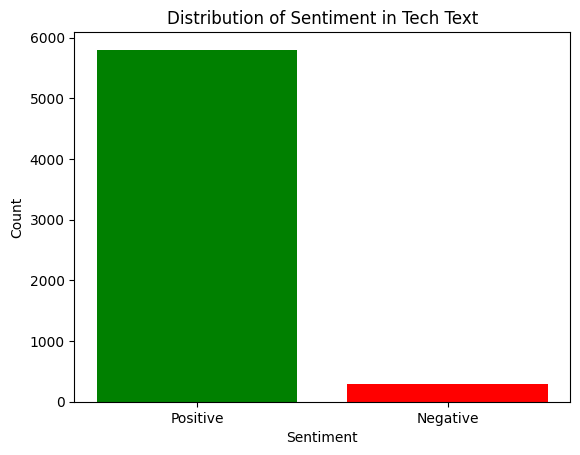

In [11]:
import matplotlib.pyplot as plt

positive_count_tech = sum(score > 0 for score in sentiment_scores_tech)
negative_count_tech = sum(score < 0 for score in sentiment_scores_tech)
positive_dict['tech']=positive_count_tech
negative_dict['tech']=negative_count_tech
print(positive_count_tech, negative_count_tech)

sentiment_labels = ['Positive', 'Negative']
sentiment_counts = [positive_count_tech, negative_count_tech]

plt.bar(sentiment_labels, sentiment_counts, color=['green', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment in Tech Text')
plt.show()

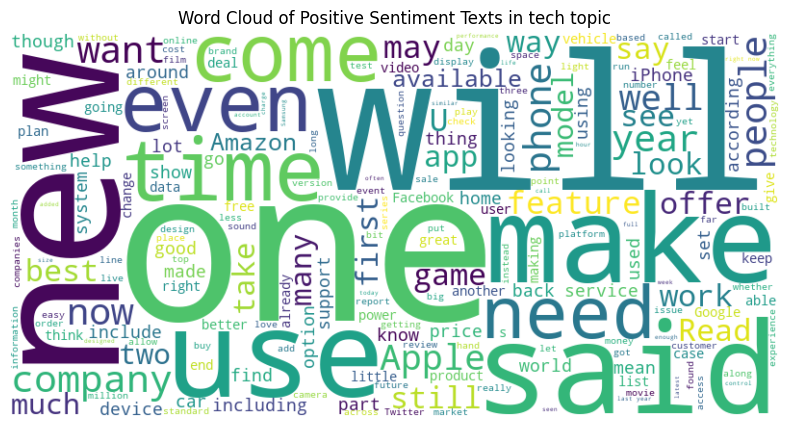

In [12]:
from wordcloud import WordCloud

positive_texts = [text for text, score in zip(data_tech, sentiment_scores_tech) if score > 0]
positive_text = ' '.join(positive_texts)
wordcloud = WordCloud(width=800, height=400,background_color='white').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Sentiment Texts in tech topic')
plt.show()

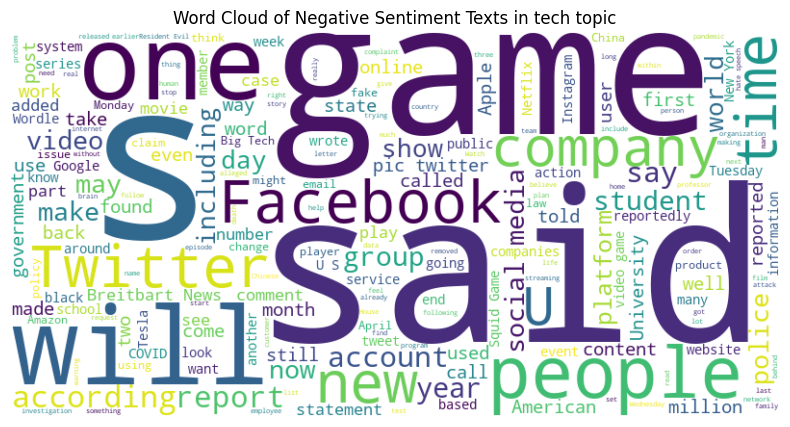

In [13]:
negative_texts = [text for text, score in zip(data_tech, sentiment_scores_tech) if score < 0]
negative_text = ' '.join(negative_texts)
wordcloud = WordCloud(width=800, height=400,background_color='white').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Sentiment Texts in tech topic')
plt.show()

In [14]:
sports_df = data[data['topic'] == 'sports']
data_sports = sports_df['text']
#print(data_sports)

sentiment_scores_sport = []
for text in data_sports:
    blob = TextBlob(text)
    sentiment_scores_sport.append(blob.sentiment.polarity)
sport_sentiment = pd.DataFrame({'text': data_sports, 'sentiment_score': sentiment_scores_sport})

print(sport_sentiment)

                                                    text  sentiment_score
4      State Lawmakers in Florida are poised to rejec...         0.067083
7      Tennessee Titans lineman Taylor Lewan had hims...         0.134259
9      It sounds like Jon Gruden is gearing up for a ...         0.035904
10     New England Patriots head coach Bill Belichick...         0.207740
12     Wisconsin is expected to crush Illinois to sta...         0.138095
...                                                  ...              ...
60119  The Wizards and Cavaliers won’t play as schedu...        -0.039410
60129  Quarterback Luke McCaffrey is on the move agai...         0.237778
60133  An “angry” fan donated $100,000 to PETA despit...         0.087269
60137  The NFL has seen a huge jump in average number...         0.054000
60141  Los Angeles Rams’ cornerback Jalen Ramsey repo...         0.186154

[6100 rows x 2 columns]


5143 956


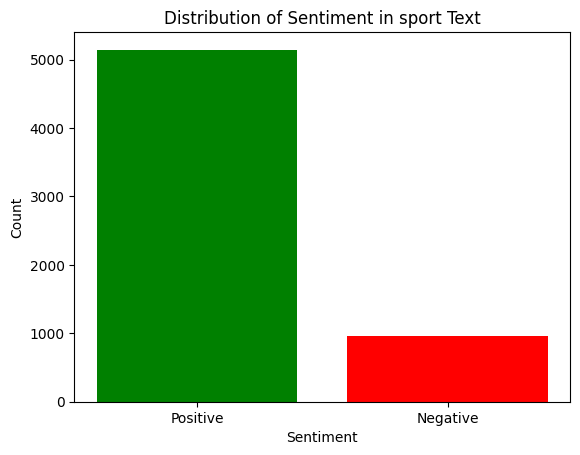

In [15]:
positive_count_sport = sum(score > 0 for score in sentiment_scores_sport)
negative_count_sport = sum(score < 0 for score in sentiment_scores_sport)

positive_dict['sports']=positive_count_sport
negative_dict['sports']=negative_count_sport

print(positive_count_sport, negative_count_sport)


sentiment_labels = ['Positive', 'Negative']
sentiment_counts = [positive_count_sport, negative_count_sport]

plt.bar(sentiment_labels, sentiment_counts, color=['green', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment in sport Text')
plt.show()

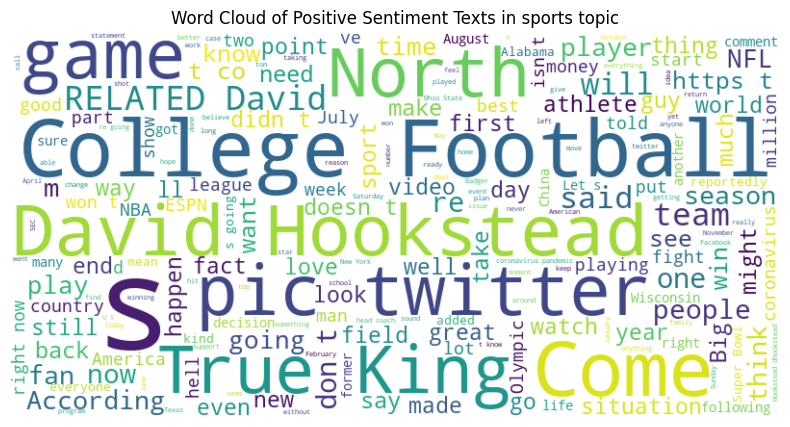

In [16]:
positive_texts = [text for text, score in zip(data_sports, sentiment_scores_sport) if score > 0]
positive_text = ' '.join(positive_texts)
wordcloud = WordCloud(width=800, height=400,background_color='white').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Sentiment Texts in sports topic')
plt.show()

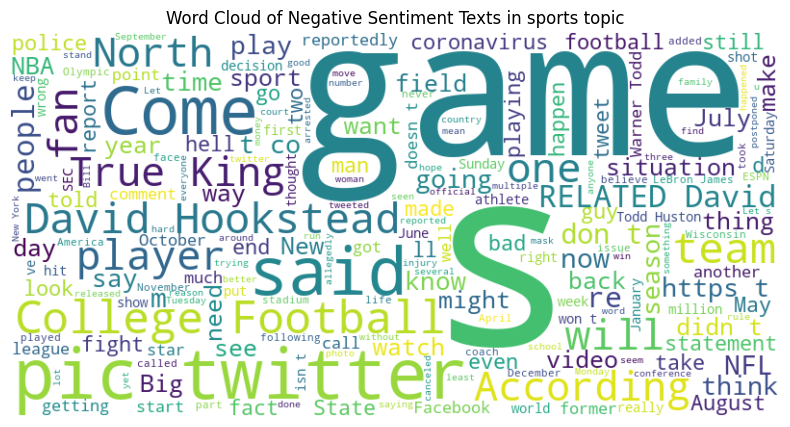

In [17]:
negative_texts = [text for text, score in zip(data_sports, sentiment_scores_sport) if score < 0]
negative_text = ' '.join(negative_texts)
wordcloud = WordCloud(width=800, height=400,background_color='white').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Sentiment Texts in sports topic')
plt.show()

In [18]:
weird_df = data[data['topic'] == 'weird-news']
data_weird = weird_df['text']
print(data_weird)

sentiment_scores_weird = []
for text in data_weird:
    blob = TextBlob(text)
    sentiment_scores_weird.append(blob.sentiment.polarity)
weird_sentiment = pd.DataFrame({'text': data_weird, 'sentiment_score': sentiment_scores_weird})

print(weird_sentiment)

0        With the chilly season in full swing, Aldi sho...
31       A chef has revealed how he makes his mashed po...
59       When it comes to choosing a baby name, most pa...
61       When you think of roast potatoes, you might no...
83       It's a happy moment for any student when they ...
                               ...                        
60047    If you're someone that loves a challenge, we'v...
60054    Police officers who were out reassuring the pu...
60056    Full English fans can be very particular about...
60063    When moving into a new place, you never quite ...
60083    A psychic who claims he predicted the coronavi...
Name: text, Length: 5121, dtype: object
                                                    text  sentiment_score
0      With the chilly season in full swing, Aldi sho...         0.238031
31     A chef has revealed how he makes his mashed po...         0.278915
59     When it comes to choosing a baby name, most pa...         0.037910
61     When you

4521 600


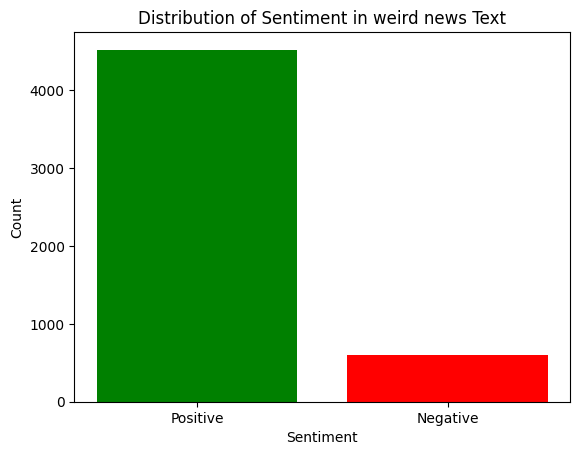

In [19]:
positive_count_weird = sum(score > 0 for score in sentiment_scores_weird)
negative_count_weird = sum(score < 0 for score in sentiment_scores_weird)

positive_dict['weird-news']=positive_count_weird
negative_dict['weird-news']=negative_count_weird
print(positive_count_weird, negative_count_weird)

sentiment_labels = ['Positive', 'Negative']
sentiment_counts = [positive_count_weird, negative_count_weird]

plt.bar(sentiment_labels, sentiment_counts, color=['green', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment in weird news Text')
plt.show()

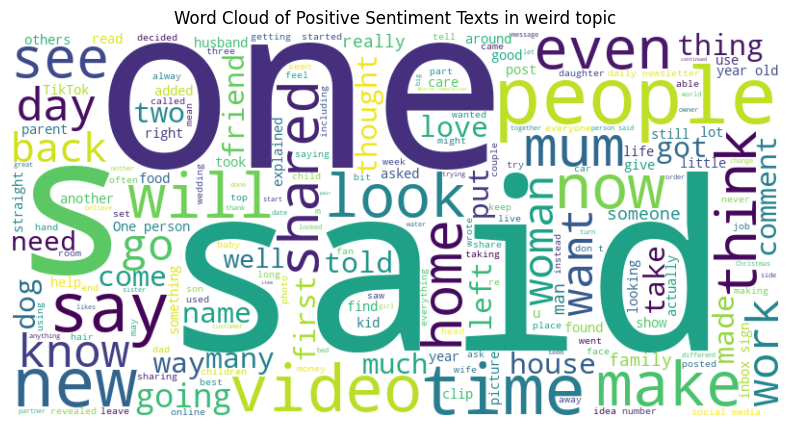

In [20]:
positive_texts = [text for text, score in zip(data_weird, sentiment_scores_weird) if score > 0]
positive_text = ' '.join(positive_texts)
wordcloud = WordCloud(width=800, height=400,background_color='white').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Sentiment Texts in weird topic')
plt.show()

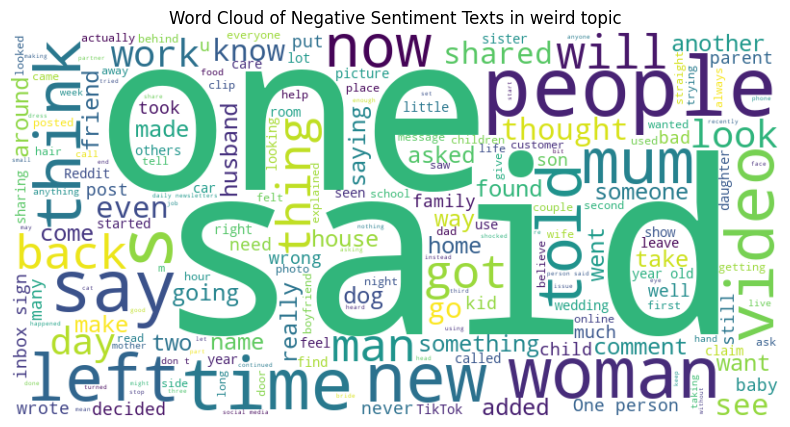

In [21]:
negative_texts = [text for text, score in zip(data_weird, sentiment_scores_weird) if score < 0]
negative_text = ' '.join(negative_texts)
wordcloud = WordCloud(width=800, height=400,background_color='white').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Sentiment Texts in weird topic')
plt.show()

In [22]:
entertainment_df = data[data['topic'] == 'entertainment & celebrity']
data_entertainment = entertainment_df['text']
print(data_entertainment)

sentiment_scores_entertainment = []
for text in data_entertainment:
    blob = TextBlob(text)
    sentiment_scores_entertainment.append(blob.sentiment.polarity)
entertainment_sentiment = pd.DataFrame(
    {'text': data_entertainment, 'sentiment_score': sentiment_scores_entertainment})

print(entertainment_sentiment)

2        Caitlyn Jenner backed comedy icon Dave Chappel...
6        Pamela Anderson joked that her 12-day marriage...
17       Singer-Songwriter John Prine passed away Tuesd...
38       The new Bake Off season is finally here, and i...
46       Are you feeling lucky?\nThere is a massive £40...
                               ...                        
60107    Bristol TV star Carol Vorderman has clashed wi...
60109    Comedian John Mulaney explained in his “Saturd...
60110    Kevin Clifton and Stacey Dooley are dating aft...
60115    You've woken up at 9am on a Sunday morning. Yo...
60118    DES MOINES, Iowa (AP) — A rock band canceled a...
Name: text, Length: 6043, dtype: object
                                                    text  sentiment_score
2      Caitlyn Jenner backed comedy icon Dave Chappel...         0.189907
6      Pamela Anderson joked that her 12-day marriage...         0.078727
17     Singer-Songwriter John Prine passed away Tuesd...         0.189941
38     The new 

5412 628


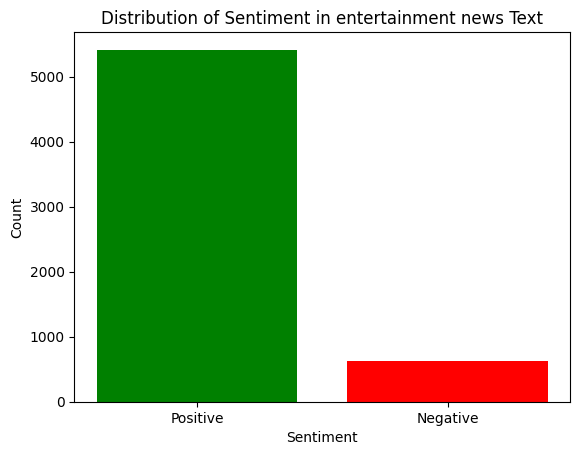

In [23]:
positive_count_entertainment = sum(score > 0 for score in sentiment_scores_entertainment)
negative_count_entertainment = sum(score < 0 for score in sentiment_scores_entertainment)

positive_dict['entertainment & celebrity']=positive_count_entertainment
negative_dict['entertainment & celebrity']=negative_count_entertainment

print(positive_count_entertainment, negative_count_entertainment)

sentiment_labels = ['Positive', 'Negative']
sentiment_counts = [positive_count_entertainment, negative_count_entertainment]

plt.bar(sentiment_labels, sentiment_counts, color=['green', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment in entertainment news Text')
plt.show()

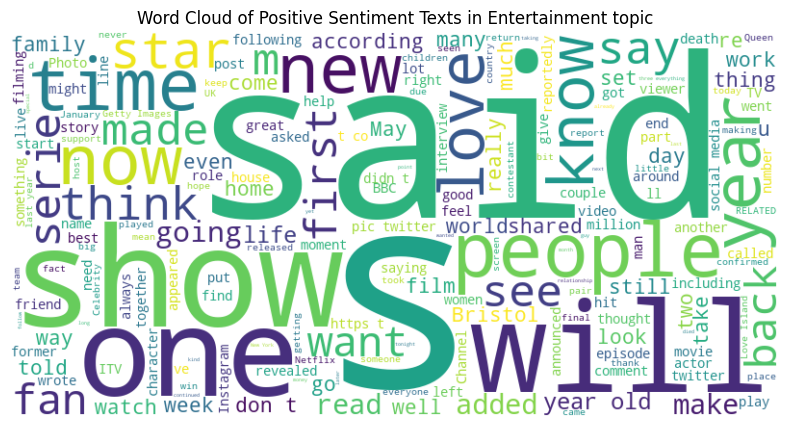

In [24]:
positive_texts = [text for text, score in zip(data_entertainment, sentiment_scores_entertainment) if score > 0]
positive_text = ' '.join(positive_texts)
wordcloud = WordCloud(width=800, height=400,background_color='white').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Sentiment Texts in Entertainment topic')
plt.show()

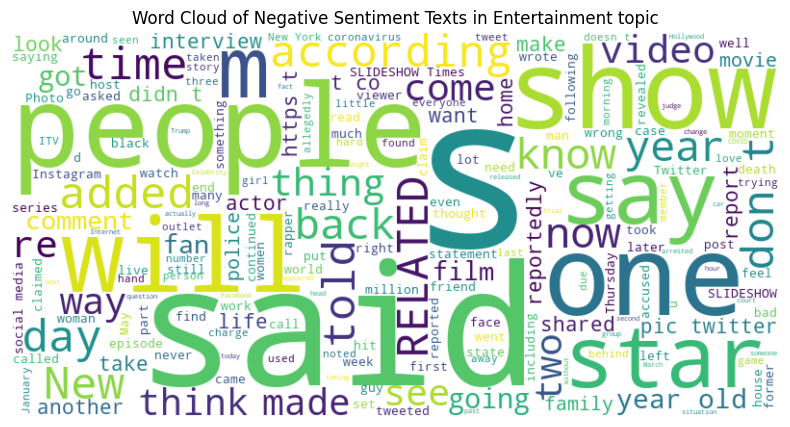

In [25]:
negative_texts = [text for text, score in zip(data_entertainment, sentiment_scores_entertainment) if score < 0]
negative_text = ' '.join(negative_texts)
wordcloud = WordCloud(width=800, height=400,background_color='white').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Sentiment Texts in Entertainment topic')
plt.show()

In [26]:
crime_df = data[data['topic'] == 'crime & security']
data_crime = crime_df['text']
print(data_crime)

sentiment_scores_crime = []
for text in data_crime:
    blob = TextBlob(text)
    sentiment_scores_crime.append(blob.sentiment.polarity)
crime_sentiment = pd.DataFrame(
    {'text': data_crime, 'sentiment_score': sentiment_scores_crime})

print(crime_sentiment)

5        A neo-Nazi former Army driver who stockpiled e...
16        Met boss Cressida Dick has made a heartfelt a...
27        Desperate Prince Andrew is plotting a last-di...
33       A “hot” criminal who earned an army of admirer...
55       Murdered Brit mum Caroline Crouch wrote coded ...
                               ...                        
60070    British police have held high-level talks with...
60100    Three robbers who stole Rolex watches from vic...
60105    Two men have been found guilty of killing 39 V...
60132     One of Meghan Markle's acting efforts have be...
60138    A university student accused of killing his fi...
Name: text, Length: 6165, dtype: object
                                                    text  sentiment_score
5      A neo-Nazi former Army driver who stockpiled e...         0.025515
16      Met boss Cressida Dick has made a heartfelt a...         0.069876
27      Desperate Prince Andrew is plotting a last-di...         0.027064
33     A “hot” 

3197 2961


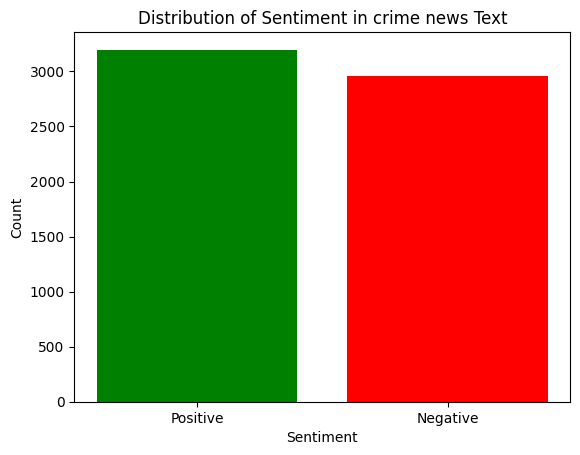

In [27]:
positive_count_crime = sum(score > 0 for score in sentiment_scores_crime)
negative_count_crime = sum(score < 0 for score in sentiment_scores_crime)

positive_dict['crime & security']=positive_count_crime
negative_dict['crime & security']=negative_count_crime

print(positive_count_crime, negative_count_crime)

sentiment_labels = ['Positive', 'Negative']
sentiment_counts = [positive_count_crime, negative_count_crime]

plt.bar(sentiment_labels, sentiment_counts, color=['green', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment in crime news Text')
plt.show()

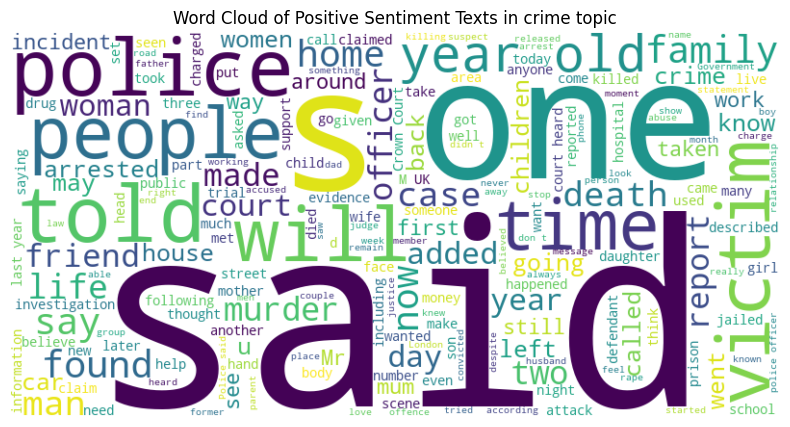

In [28]:
positive_texts = [text for text, score in zip(data_crime, sentiment_scores_crime) if score > 0]
positive_text = ' '.join(positive_texts)
wordcloud = WordCloud(width=800, height=400,background_color='white').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Sentiment Texts in crime topic')
plt.show()

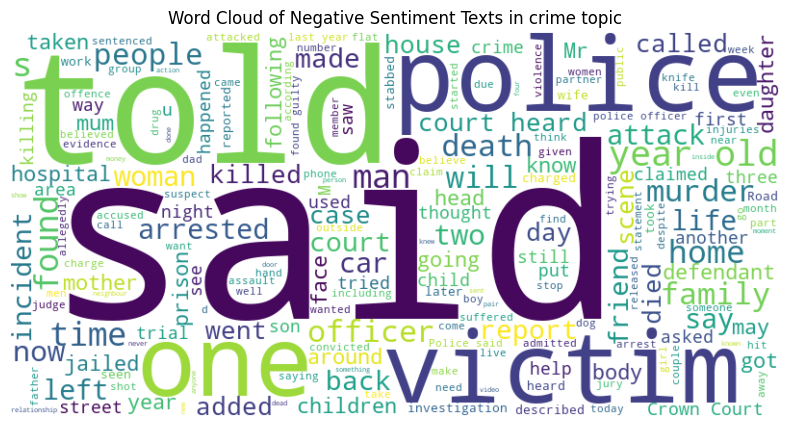

In [29]:
negative_texts = [text for text, score in zip(data_crime, sentiment_scores_crime) if score < 0]
negative_text = ' '.join(negative_texts)
wordcloud = WordCloud(width=800, height=400,background_color='white').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Sentiment Texts in crime topic')
plt.show()

In [30]:
business_df = data[data['topic'] == 'business & economy']
data_business = business_df['text']
print(data_business)

sentiment_scores_business = []
for text in data_business:
    blob = TextBlob(text)
    sentiment_scores_business.append(blob.sentiment.polarity)
business_sentiment = pd.DataFrame({'text': data_business, 'sentiment_score': sentiment_scores_business})

print(business_sentiment)

8        A Twitter executive said Tuesday that it is “n...
20       One of the nation’s biggest insurance provider...
25       Amazon is blaming the U.S. Postal Service for ...
26       New Jersey Gov. Chris Christie on Wednesday si...
28       Research In Motion Ltd. (RIMM) has lost so muc...
                               ...                        
60126    Twitter suspended a popular comedy account Tue...
60127    BRUSSELS (AP) — The European Union’s antitrust...
60130    While President-elect Donald Trump is opposed ...
60134    Goldman Sachs Group Inc. dramatically downgrad...
60144    Venture capitalist Chamath Palihapitiya sold t...
Name: text, Length: 6164, dtype: object
                                                    text  sentiment_score
8      A Twitter executive said Tuesday that it is “n...         0.126734
20     One of the nation’s biggest insurance provider...         0.079472
25     Amazon is blaming the U.S. Postal Service for ...        -0.000978
26     New Jers

5362 791


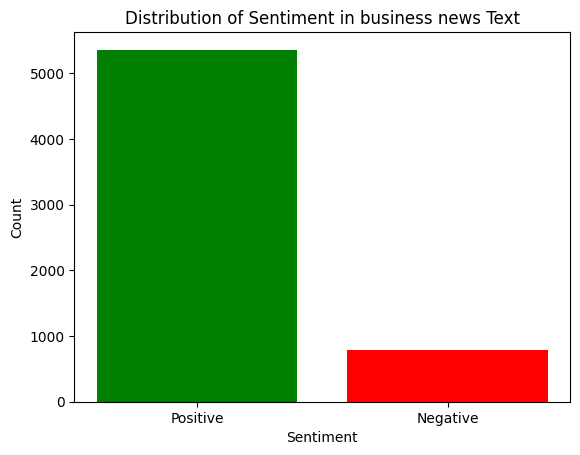

In [31]:
positive_count_business = sum(score > 0 for score in sentiment_scores_business)
negative_count_business = sum(score < 0 for score in sentiment_scores_business)

positive_dict['business & economy']=positive_count_business
negative_dict['business & economy']=negative_count_business

print(positive_count_business, negative_count_business)

sentiment_labels = ['Positive', 'Negative']
sentiment_counts = [positive_count_business, negative_count_business]

plt.bar(sentiment_labels, sentiment_counts, color=['green', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment in business news Text')
plt.show()

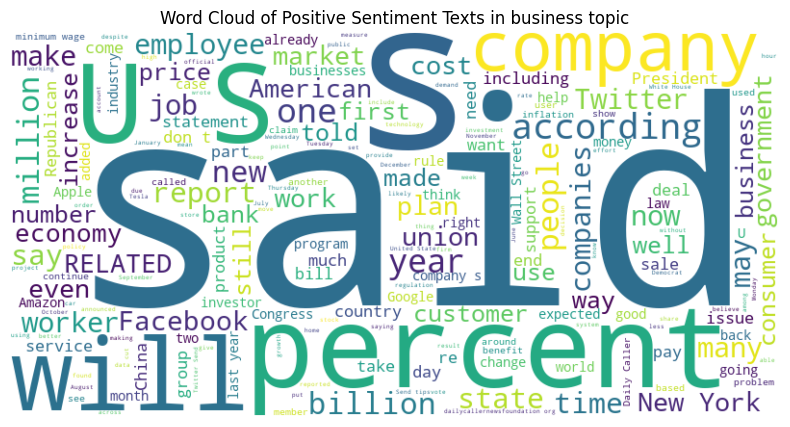

In [32]:
positive_texts = [text for text, score in zip(data_business, sentiment_scores_business) if score > 0]
positive_text = ' '.join(positive_texts)
wordcloud = WordCloud(width=800, height=400,background_color='white').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Sentiment Texts in business topic')
plt.show()

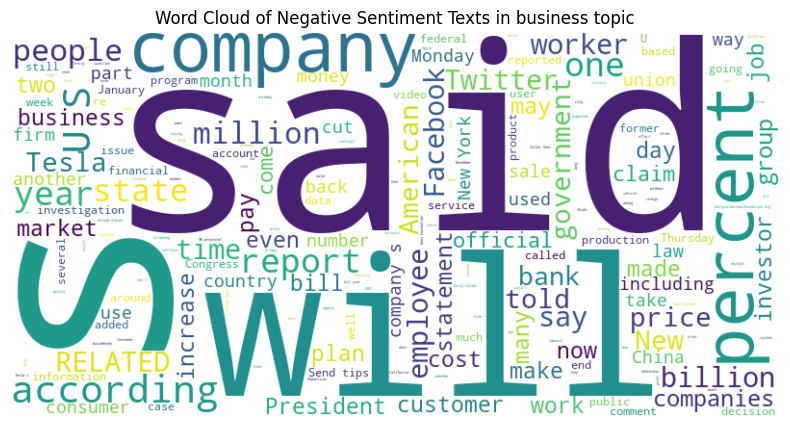

In [33]:
negative_texts = [text for text, score in zip(data_business, sentiment_scores_business) if score < 0]
negative_text = ' '.join(negative_texts)
wordcloud = WordCloud(width=800, height=400,background_color='white').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Sentiment Texts in business topic')
plt.show()

In [34]:
health_df = data[data['topic'] == 'health & education']
data_health = health_df['text']
print(data_health)

sentiment_scores_health = []
for text in data_health:
    blob = TextBlob(text)
    sentiment_scores_health.append(blob.sentiment.polarity)
health_sentiment = pd.DataFrame(
    {'text': data_health, 'sentiment_score': sentiment_scores_health})

print(health_sentiment)

11       A Sacramento, Calif., school district is petit...
39       An anti-affirmative action group sued Harvard ...
41       One of America’s biggest groups of Christian c...
50       Oberlin College, a smallish hothouse of leftis...
64       South Gloucestershire now has the highest coro...
                               ...                        
60097    A man who left two women, including one from B...
60114    A California school principal said Wednesday t...
60125    A Bristol mum has stepped back from a 'rubbish...
60128    The family of a fourth-grade boy in the suburb...
60136    Massive changes are coming for cigarette smoke...
Name: text, Length: 6152, dtype: object
                                                    text  sentiment_score
11     A Sacramento, Calif., school district is petit...         0.267982
39     An anti-affirmative action group sued Harvard ...         0.100805
41     One of America’s biggest groups of Christian c...         0.083546
50     Oberlin 

5051 1096


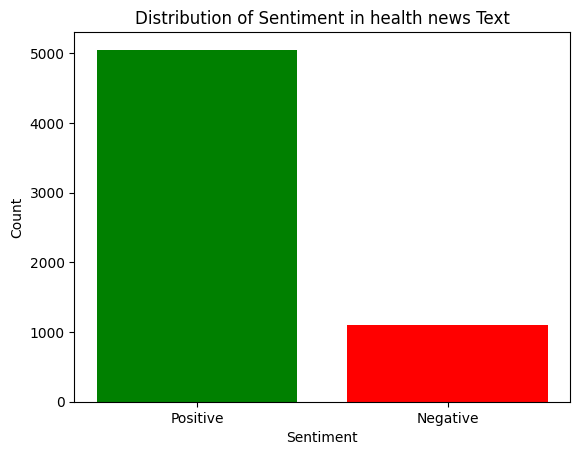

In [35]:
positive_count_health = sum(score > 0 for score in sentiment_scores_health)
negative_count_health = sum(score < 0 for score in sentiment_scores_health)

positive_dict['health & education']=positive_count_health
negative_dict['health & education']=negative_count_health

print(positive_count_health, negative_count_health)

sentiment_labels = ['Positive', 'Negative']
sentiment_counts = [positive_count_health, negative_count_health]

plt.bar(sentiment_labels, sentiment_counts, color=['green', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment in health news Text')
plt.show()

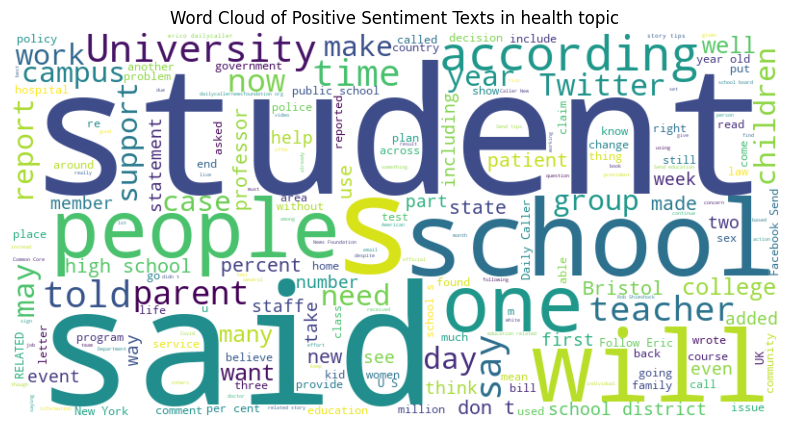

In [36]:
positive_texts = [text for text, score in zip(data_health, sentiment_scores_health) if score > 0]
positive_text = ' '.join(positive_texts)
wordcloud = WordCloud(width=800, height=400,background_color='white').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Sentiment Texts in health topic')
plt.show()

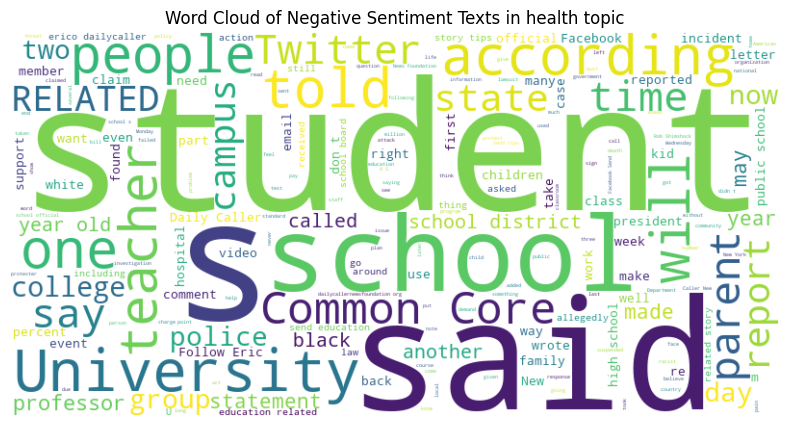

In [37]:
negative_texts = [text for text, score in zip(data_health, sentiment_scores_health) if score < 0]
negative_text = ' '.join(negative_texts)
wordcloud = WordCloud(width=800, height=400,background_color='white').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Sentiment Texts in health topic')
plt.show()

In [38]:
science_df = data[data['topic'] == 'science']
data_science = science_df['text']
print(data_science)

sentiment_scores_science = []
for text in data_science:
    blob = TextBlob(text)
    sentiment_scores_science.append(blob.sentiment.polarity)
science_sentiment = pd.DataFrame({'text': data_science, 'sentiment_score': sentiment_scores_science})

print(science_sentiment)

13       An increase in reports of big Asian tiger shri...
30       A meteor explosion in the skies above Russia t...
40       There’s a new dog in town, or at least there w...
45       Shark tots just a few months old are making th...
51       Antarctica is slowly revealing more of its sec...
                               ...                        
60093    Mars, our neighboring planet, has captured peo...
60102    Hundreds of eager spectators lined Manhattan's...
60112    It will be at least another day until NASA can...
60116    Researchers at Purdue University have develope...
60123    NASA's New Horizons spacecraft has snapped its...
Name: text, Length: 6100, dtype: object
                                                    text  sentiment_score
13     An increase in reports of big Asian tiger shri...         0.010750
30     A meteor explosion in the skies above Russia t...         0.042661
40     There’s a new dog in town, or at least there w...         0.067049
45     Shark to

5942 158


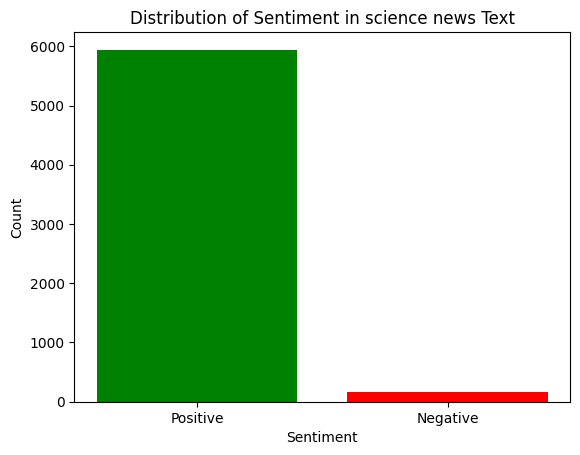

In [39]:
positive_count_science = sum(score > 0 for score in sentiment_scores_science)
negative_count_science = sum(score < 0 for score in sentiment_scores_science)

positive_dict['science']=positive_count_science
negative_dict['science']=negative_count_science

print(positive_count_science, negative_count_science)

sentiment_labels = ['Positive', 'Negative']
sentiment_counts = [positive_count_science, negative_count_science]

plt.bar(sentiment_labels, sentiment_counts, color=['green', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment in science news Text')
plt.show()

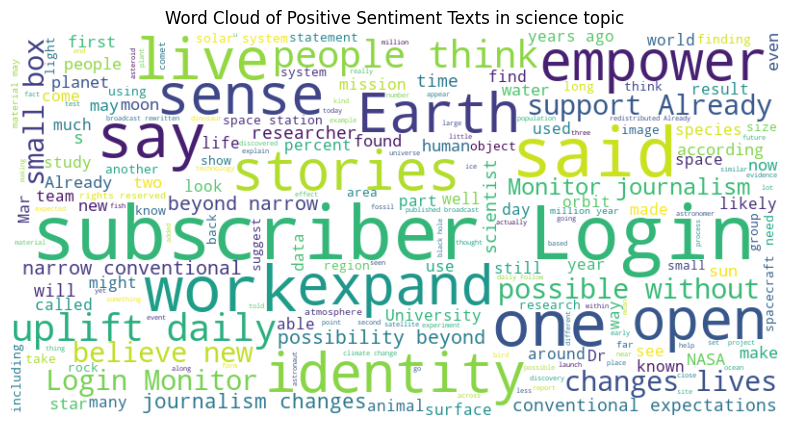

In [40]:
positive_texts = [text for text, score in zip(data_science, sentiment_scores_science) if score > 0]
positive_text = ' '.join(positive_texts)
wordcloud = WordCloud(width=800, height=400,background_color='white').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Sentiment Texts in science topic')
plt.show()

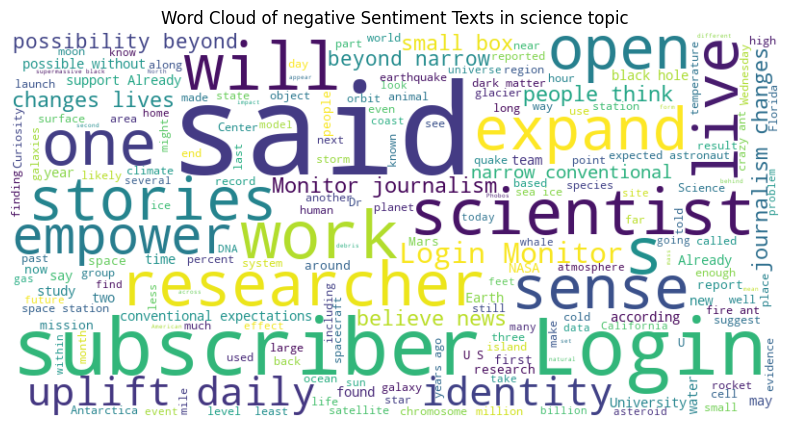

In [41]:
negative_texts = [text for text, score in zip(data_science, sentiment_scores_science) if score < 0]
negative_text = ' '.join(negative_texts)
wordcloud = WordCloud(width=800, height=400,
                      background_color='white').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of negative Sentiment Texts in science topic')
plt.show()

In [42]:
politics_df = data[data['topic'] == 'politics']
data_politics = politics_df['text']
print(data_politics)

sentiment_scores_politics = []
for text in data_politics:
    blob = TextBlob(text)
    sentiment_scores_politics.append(blob.sentiment.polarity)
politics_sentiment = pd.DataFrame(
    {'text': data_politics, 'sentiment_score': sentiment_scores_politics})

print(politics_sentiment)

14       Crime has become front and center for people w...
18       Sixty-two percent of American voters believe P...
22       Far-left “Squad” member Rep. Rashida Tlaib (D-...
24       After President Biden warned those responsible...
32       Seventy-seven percent of Americans believe inf...
                               ...                        
60104    European Union member-state Latvia has announc...
60111    Arizona Attorney General Mark Brnovich’s offic...
60117    The Food and Drug Administration [FDA] asked a...
60135    On Wednesday’s broadcast of CNN’s “Situation R...
60139    Migrant detention facilities in West Texas, al...
Name: text, Length: 6100, dtype: object
                                                    text  sentiment_score
14     Crime has become front and center for people w...         0.088869
18     Sixty-two percent of American voters believe P...         0.058485
22     Far-left “Squad” member Rep. Rashida Tlaib (D-...         0.037926
24     After Pr

4792 1299


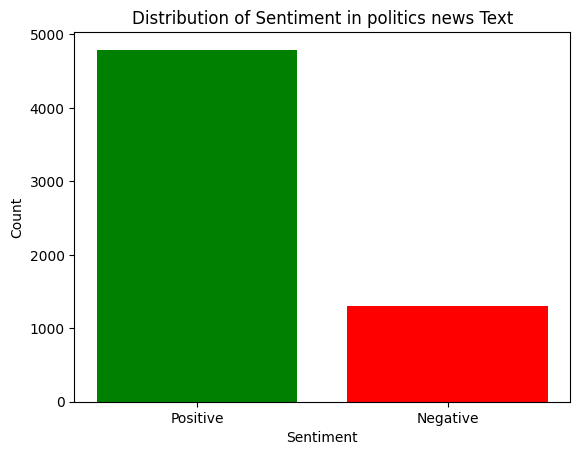

In [43]:
positive_count_politics = sum(score > 0 for score in sentiment_scores_politics)
negative_count_politics = sum(score < 0 for score in sentiment_scores_politics)

positive_dict['politics']=positive_count_politics
negative_dict['politics']=negative_count_politics

print(positive_count_politics, negative_count_politics)

sentiment_labels = ['Positive', 'Negative']
sentiment_counts = [positive_count_politics, negative_count_politics]

plt.bar(sentiment_labels, sentiment_counts, color=['green', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment in politics news Text')
plt.show()

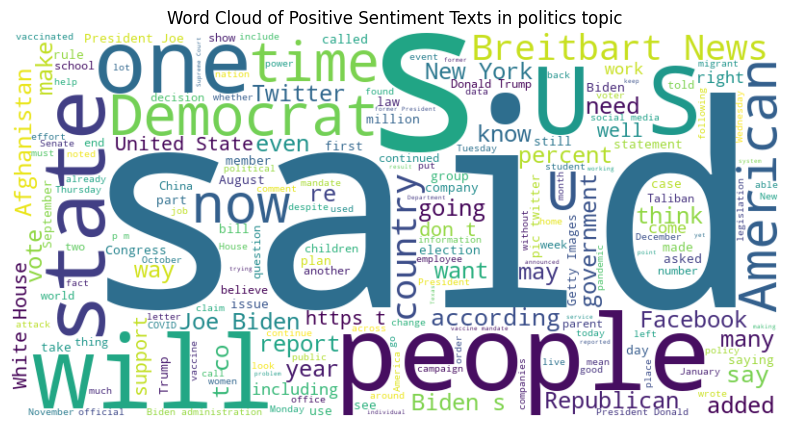

In [44]:
positive_texts = [text for text, score in zip(data_politics, sentiment_scores_politics) if score > 0]
positive_text = ' '.join(positive_texts)
wordcloud = WordCloud(width=800, height=400,background_color='white').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Sentiment Texts in politics topic')
plt.show()

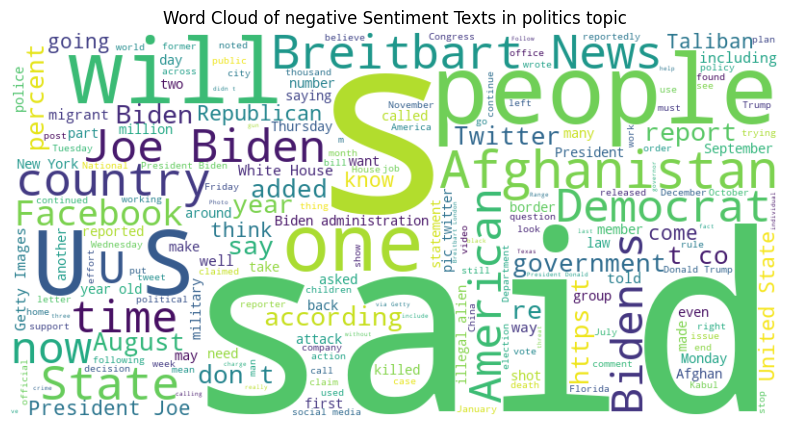

In [45]:
negative_texts = [text for text, score in zip(data_politics, sentiment_scores_politics) if score < 0]
negative_text = ' '.join(negative_texts)
wordcloud = WordCloud(width=800, height=400,background_color='white').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of negative Sentiment Texts in politics topic')
plt.show()

In [46]:
arts_df = data[data['topic'] == 'arts-culture']
data_arts = arts_df['text']
print(data_arts)

sentiment_scores_arts = []
for text in data_arts:
    blob = TextBlob(text)
    sentiment_scores_arts.append(blob.sentiment.polarity)
arts_sentiment = pd.DataFrame(
    {'text': data_arts, 'sentiment_score': sentiment_scores_arts})

print(arts_sentiment)

19       I was sitting in an airport when I overheard a...
21       My dad was a great talker. For a man who spent...
29       This year’s Shannonside Winter Music weekend w...
37       Which author has invented the most English wor...
66       From Shannon to Sesame Street through Major Le...
                               ...                        
60122    Originally, according to the story in the Bibl...
60131    These are spicy! Kinda. And dipped in chocolat...
60140    Who knew that a Walt Disney cartoon made years...
60142    You’ve see me around. I’m the dad struggling w...
60143    TV REVIEW\n   STEPHEN Fry caused quite a stir ...
Name: text, Length: 6100, dtype: object
                                                    text  sentiment_score
19     I was sitting in an airport when I overheard a...         0.191364
21     My dad was a great talker. For a man who spent...         0.104881
29     This year’s Shannonside Winter Music weekend w...         0.264311
37     Which au

5888 155


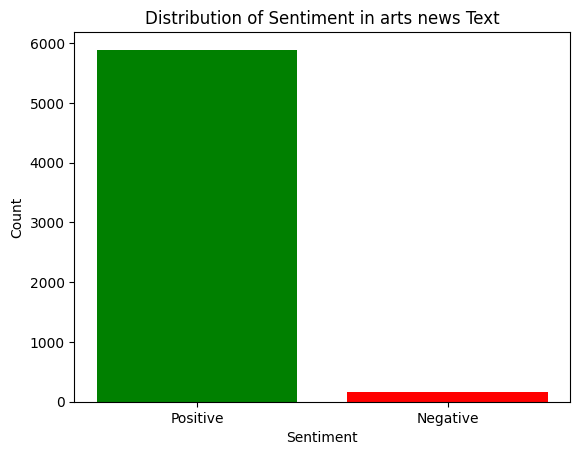

In [47]:
positive_count_arts = sum(score > 0 for score in sentiment_scores_arts)
negative_count_arts = sum(score < 0 for score in sentiment_scores_arts)

positive_dict['arts-culture']=positive_count_arts
negative_dict['arts-culture']=negative_count_arts

print(positive_count_arts, negative_count_arts)

sentiment_labels = ['Positive', 'Negative']
sentiment_counts = [positive_count_arts, negative_count_arts]

plt.bar(sentiment_labels, sentiment_counts, color=['green', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment in arts news Text')
plt.show()

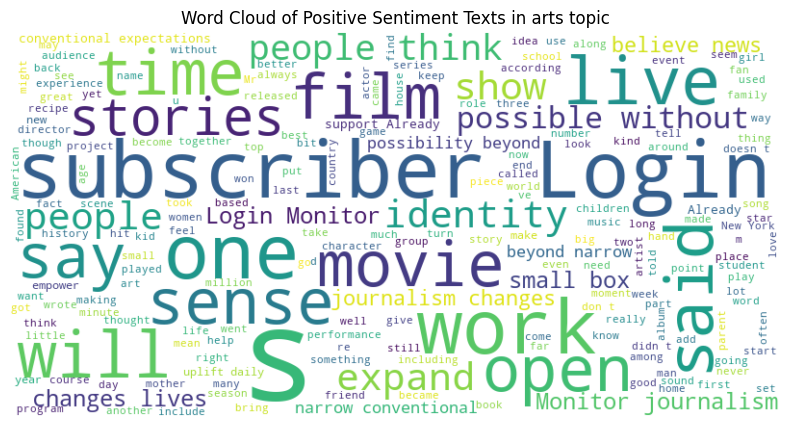

In [48]:
positive_texts = [text for text, score in zip(data_arts, sentiment_scores_arts) if score > 0]
positive_text = ' '.join(positive_texts)
wordcloud = WordCloud(width=800, height=400,background_color='white').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Sentiment Texts in arts topic')
plt.show()

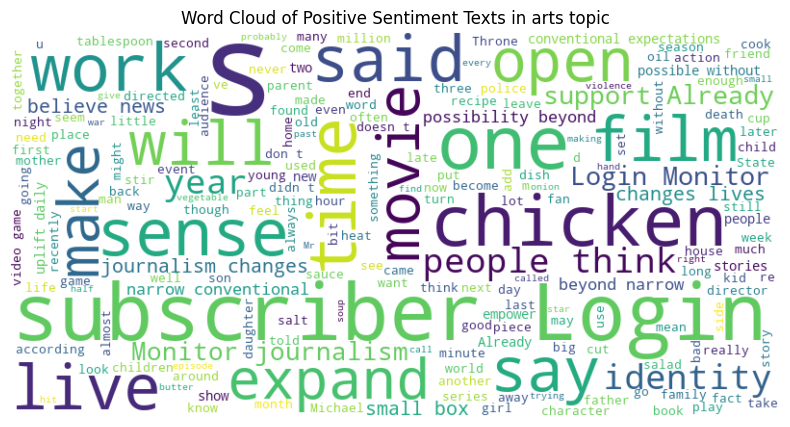

In [49]:
negative_texts = [text for text, score in zip(data_arts, sentiment_scores_arts) if score < 0]
negative_text = ' '.join(negative_texts)
wordcloud = WordCloud(width=800, height=400,background_color='white').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Sentiment Texts in arts topic')
plt.show()

In [50]:
print(positive_dict)
print(negative_dict)

{'tech': 5799, 'sports': 5143, 'weird-news': 4521, 'entertainment & celebrity': 5412, 'crime & security': 3197, 'business & economy': 5362, 'health & education': 5051, 'science': 5942, 'politics': 4792, 'arts-culture': 5888}
{'tech': 299, 'sports': 956, 'weird-news': 600, 'entertainment & celebrity': 628, 'crime & security': 2961, 'business & economy': 791, 'health & education': 1096, 'science': 158, 'politics': 1299, 'arts-culture': 155}


In [51]:
difference_list={}
for i in arr:
    difference_list[i]=positive_dict[i]-negative_dict[i]
    print(i, difference_list[i])

    

weird-news 3921
tech 5500
entertainment & celebrity 4784
sports 4187
crime & security 236
business & economy 4571
health & education 3955
science 5784
politics 3493
arts-culture 5733


In [52]:
sorted_dict = {k: v for k, v in sorted(difference_list.items(), key=lambda item: item[1])}
print("Sorted dictionary:", sorted_dict)

Sorted dictionary: {'crime & security': 236, 'politics': 3493, 'weird-news': 3921, 'health & education': 3955, 'sports': 4187, 'business & economy': 4571, 'entertainment & celebrity': 4784, 'tech': 5500, 'arts-culture': 5733, 'science': 5784}


In [53]:
sad_cat=['crime & security','politics','weird-news','health & education','sports']
hap_cat=['business','entertainment','tech','arts','science']

In [54]:
def gethappynews():
    return hap_cat 
    

In [55]:
def getsadnews():
    return sad_cat
    

In [56]:
mood=input("please enter either happy or sad")
if(mood=='happy'):
    print(gethappynews())
else:
    print(getsadnews())

['business', 'entertainment', 'tech', 'arts', 'science']
